# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [77]:
data = pd.read_excel( 'geo.xlsx' )
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [78]:
data =data[['x','y', 'comment_class']]

In [79]:
# разделим комментарии на 2 части: за и против 
comment_positive = data[data['comment_class']==1]
print(len(comment_positive))
comment_negative = data[data['comment_class']==-1]
print(len(comment_negative))

13659
95147


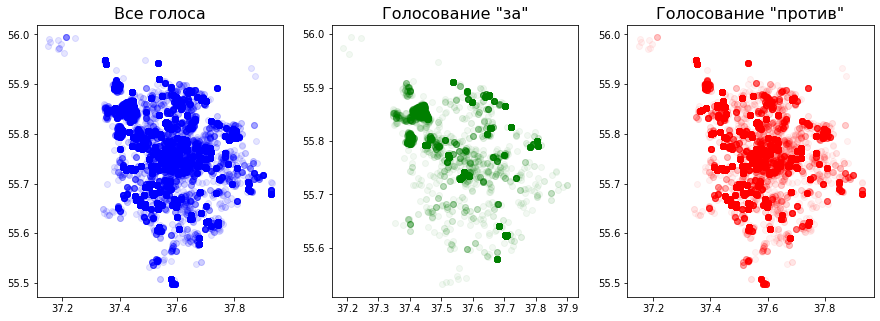

In [80]:
# представим это отношение визуально: на графике изобразим плотность положительных и отрицательных голосов 

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))          

ax1.scatter(x=data.x, y=data.y, alpha=0.1, color='b')
ax2.scatter(x=comment_positive.x, y=comment_positive.y, alpha=0.05, color='g')
ax3.scatter(x=comment_negative.x, y=comment_negative.y, alpha=0.05, color='r')

titles = ['Все голоса', 'Голосование "за"', 'Голосование "против"']

for pic, title in zip (fig.axes, titles):
    pic.set_title(title, fontsize=16)

## визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [45]:
data_without_votes = data.drop('comment_class', axis=1)

In [48]:
# обучим модель 
clf_kmeans = KMeans(n_clusters=10, max_iter=400, random_state=42) # Количество кластеров по количеству административных округов
clusters = clf_kmeans.fit_predict(data_without_votes)

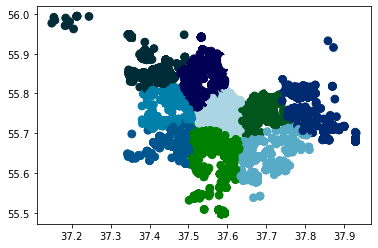

In [49]:
# визуализируем результат
plt.scatter(data_without_votes.x, data_without_votes.y, c=clusters, cmap='ocean', s=60) 

## аналогично исследовать скопления голосов за и против отдельно

In [68]:
# Позитивное голосование
comment_positive_without_votes = comment_positive.drop('comment_class', axis=1)

In [69]:
clf_kmeans_pozitiv = clf_kmeans.fit(comment_positive_without_votes)
clusters_pozitiv = clf_kmeans.fit_predict(comment_positive_without_votes)

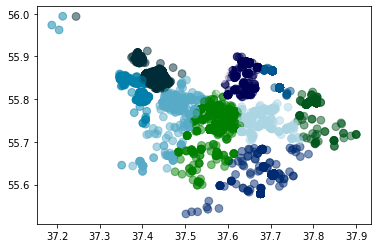

In [71]:
plt.scatter(comment_positive_without_votes.x, comment_positive_without_votes.y, c=clusters_pozitiv, alpha=0.5, cmap='ocean',  s=60)

In [72]:
# Негативное голосование
comment_negative_without_votes = comment_negative.drop('comment_class', axis=1)

In [73]:
clf_kmeans_negative = clf_kmeans.fit(comment_negative_without_votes)

In [74]:
clusters_negative = clf_kmeans.fit_predict(comment_negative_without_votes)

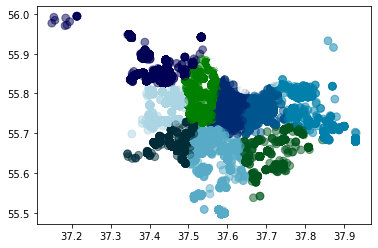

In [75]:
plt.scatter(comment_negative_without_votes.x, comment_negative_without_votes.y, c=clusters_negative, alpha=0.5, cmap='ocean',  s=60)

## подобрать оптимальное число кластеров 

In [81]:
# Подбор количества клатеров без учета данных голосования.
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_without_votes, )
    k_inertia.append(clf_kmeans.inertia_)

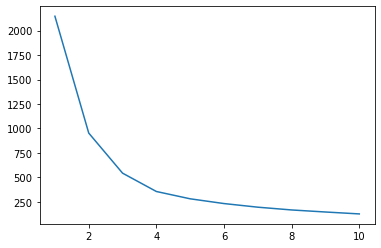

In [82]:
plt.plot(ks, k_inertia)

In [ ]:
## Оптимальное количество кластеров согласно, полученного графика 4.